In [414]:
# Initialize Otter
import otter
grader = otter.Notebook("cs109a_hw3.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 3: Polynomial and LASSO Regression

**Harvard University**<br/>
**Fall 2022**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [415]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

#### Instructions
- To submit your assignment follow the instructions given in Canvas.
- Plots should be legible and interpretable without having to refer to the code that generated them, including labels for the $x$- and $y$-axes as well as a descriptive title and/or legend when appropriate.
- When asked to interpret a visualization, do not simply describe it (e.g., "the curve has a steep slope up"), but instead explain what you think the plot *means*.
- The use of 'hard-coded' values to try and pass tests rather than solving problems programmatically will not receive credit.
- The use of *extremely* inefficient or error-prone code (e.g., copy-pasting nearly identical commands rather than looping) may result in only partial credit.
- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. Please get course staff approval before importing any additional 3rd party libraries.
- Enable scrolling output on cells with very long output.
- Feel free to add additional code or markdown cells as needed.
- Ensure your code runs top to bottom without error and passes all tests by restarting the kernel and running all cells. This is how the notebook will be evaluated (note that this can take a few minutes). 
- **The notebook you submit must be run in order with all output visible**

### Import Libraries

In [416]:
from collections import Counter
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle

%matplotlib inline

<a id="contents"></a>

## Notebook contents

- [**Overview and data description**](#intro)


- [**Question 1: Data visualization [5 pts]**](#part1)

- [**Your Homework 3 roadmap**](#roadmap)


- [**Question 2: Guesstimate the polynomial relationship [14 pts]**](#part2)

- [**Question 3: Use a validation set to find the most promising polynomial relationship [12 pts]**](#part3)

- [**Question 4: Finding the best model by k-fold cross validation [14 pts]**](#part4)

- [**Question 5: Finding the most consistent model using k-fold cross validation with bootstraps [16 pts]**](#part5)

- [**Question 6: Improving model consistency with LASSO regularization [33 pts]**](#part6)

- [**Question 7: Analyze your best test MSEs for each section of the homework [6 pts]**](#part7)

<a id="intro"></a>

## Overview and data description

[Return to contents](#contents)

### Predicting percentage change in bacteria populations given their spreading factor

In this homework, we will explore polynomial regression for predicting a quantitative variable. Specifically, we will build regression models that can predict the percentage change in bacteria population after 4 hours based on their "spreading factor". These prediction models can be useful in clustering of a novel bacteria to any class. 

If the percentage of change in population is positive, this indicates that the size of the bacteria population has grown. One important factor to note is that the percentage change could be negative. This indicates that within the specified time frame, the population of the bacteria has decreased from its original size.

The data set for this problem has already been split for you. You will find the train and test data sets in the files `data/bacteria_train.csv` and `data/bacteria_test.csv`, respectively. The first column in each file gives information about the change in percentage of the population and the second column contains the spreading factor of bacteria populations.


### Problem Description

We will predict the percentage change in population, given the spreading factor. For this exercise, we will consider the `Spreading_factor` to be our predictor variable and `Perc_population` to be our response variable. We will explore several different approaches, with mean squared error ($MSE$) as an evaluative criteria, for finding the best fit and most robust polynomial regression for modeling this relationship.


<a id="part1"></a>

## <div class='exercise'>Question 1: Data visualization [5 pts]</div> 
    
[Return to contents](#contents)
    

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.1</b></div>

Generate a *well-labeled* scatter plot of the data points in the `bacteria_train.csv` file with the spreading factor on the $x$-axis and the percentage change on the $y$-axis.

_Points:_ 3

In [417]:
df_train = pd.read_csv('data/bacteria_train.csv')
df_train

,Perc_population,Spreading_factor
0,1.535,0.190708
1,5.555,0.326928
2,-0.277,-0.459699
3,1.724,-0.193013
4,-0.550,-0.835745
...,...,...
418,-0.461,-1.536030
419,2.179,1.445470
420,6.328,1.107800
421,3.854,0.841114


In [9]:
df_test = pd.read_csv('data/bacteria_test.csv')
df_test

,Perc_population,Spreading_factor
0,-0.516,-1.138880
1,-0.683,-1.818070
2,-0.045,-1.883300
3,1.125,-0.839582
4,-0.679,-1.478480
...,...,...
103,-0.962,-1.495740
104,3.368,0.704893
105,2.636,-0.517257
106,-0.493,-0.386792


Text(0.5, 1.0, 'Bacteria Train')

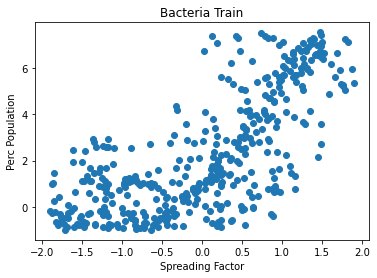

In [10]:
plt.scatter(df_train['Spreading_factor'],df_train['Perc_population'])
plt.xlabel('Spreading Factor')
plt.ylabel('Perc Population')
plt.title('Bacteria Train')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.2</b></div>

Based on the graph above, is there any discernable relationship between the spreading factor and percentage change in population?

_Points:_ 2

- Based on the scatter graph we can see the general trend, as spreading factor increases the Perc Population also increases. We can start to see the coorelation between thw two. There is a positive relationship between 'spreading_factor' and 'Perc_population'. 

<!-- END QUESTION -->

<a id="roadmap"></a>

<hr style='height:2px'> 

## Your Homework 3 roadmap

[Return to contents](#contents)

**We will be following this roadmap for Question 2 through Question 6:**

![](data/roadmap.png)


<a id="part2"></a>

## <div class='exercise'>Question 2: Guesstimate the polynomial relationship [14 pts]</div> 

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.1</b></div>

Based on your inspection in question 1, guesstimate the degree of the polynomial you believe would best fit the training while still generalizing well. Store this degree in the variable `guessed_deg`. 

Next, use `PolynomialFeatures()` to generate a design matrices of the guesstimated degree for the train and test data. Store these in `x_poly_train` and `x_poly_test`. **You should not include a bias in your design matrix.**

_Points:_ 2

In [418]:
guessed_deg = 2

In [419]:
df_train = pd.read_csv('data/bacteria_train.csv')
df_test = pd.read_csv('data/bacteria_test.csv')
df_train_sorted = df_train.sort_values(by=['Spreading_factor'], ascending=True)
df_test_sorted = df_test.sort_values(by=['Spreading_factor'], ascending=True)

In [420]:
x_train = df_train_sorted ['Spreading_factor']
x_train = np.array(x_train).reshape(-1,1)

x_test = df_test_sorted['Spreading_factor']
x_test= np.array(x_test).reshape(-1,1)

y_train = df_train_sorted ['Perc_population']
y_test = df_test_sorted ['Perc_population']

In [421]:
x_poly_train = PolynomialFeatures(degree = guessed_deg, include_bias=False).fit_transform(x_train)

In [422]:
x_poly_test = PolynomialFeatures(degree = guessed_deg, include_bias=False).fit_transform(x_test)

In [423]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.2</b></div>

Fit a polynomial regression using scikit-learn's `LinearRegression()` on the training design matrix. 

To track and compare the performance of each of the models in this notebook, use a list of dictionaries called `results`.

Each dictionary in this list will have the keys: 'model' (a string representing the question number where the model was fit), 'train_mse', and 'test_mse'.

So, for this question, you will append a dictionary to `results` of the form:
```python
{'model': '2.2', 'train_mse': 2.6749 'test_mse': 2.734}
```
Note that your MSE scores will not be the same as those in the example dictionary.

_Points:_ 2

In [424]:
# Fit a linear regression model
results_dic = {}
results = []

model_2 = LinearRegression().fit(x_poly_train, y_train)
y_train_pred = model_2.predict(x_poly_train)
y_test_pred = model_2.predict(x_poly_test)

train_mse_2 = mean_squared_error(y_train, y_train_pred)
test_mse_2 = mean_squared_error(y_test, y_test_pred)

In [425]:
results_dic['model'] = '2.2'
results_dic['train_mse'] = float(train_mse_2)
results_dic['test_mse'] = float(test_mse_2)
results.append(results_dic)

In [426]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.3</b></div>

- Create a plot showing both the train and test data, as well as your model's prediction curve.
- Display `results` as a DataFrame.
- Explain the rationale for your choice of degree (i.e. your "guesstimation") and comment on the fit of your model.
  

_Points:_ 3

- My 'guessed_deg = 2' becuase based on the plot we can see the curvature of model's prediction curve looks like it is presenting the general trend of both testing and training data sets. 

- The model's prediction curve captures the correlation relationship between perc population and spreading factor. 

- I also tested on degree 3, the resulted model prediction curve is pretty similar, but a little less smooth compared to the degree 2.

In [428]:
# results = pd.DataFrame(results)
pd.DataFrame(results)

,model,train_mse,test_mse
0,2.2,2.661715,2.674863


Text(0.5, 1.0, "2.3 Train, Test Data, Model's Prediction Curve")

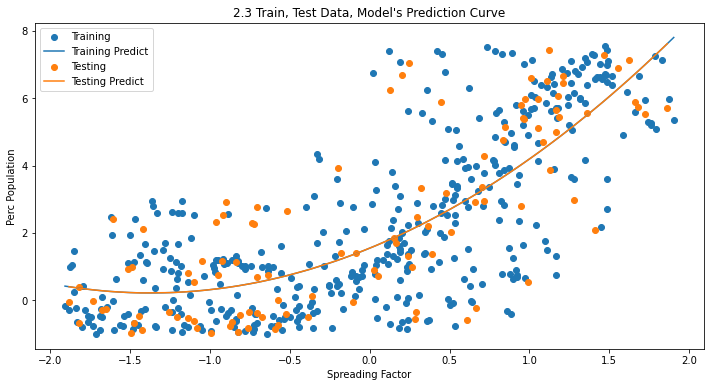

In [429]:
fig, ax = plt.subplots(figsize=(12,6))
plt.scatter(x_train, y_train, label="Training")
plt.plot(x_train, y_train_pred, label="Training Predict")

plt.scatter(x_test, y_test, label="Testing")
plt.plot(x_test, y_test_pred, label="Testing Predict")

plt.legend()
plt.xlabel('Spreading Factor')
plt.ylabel('Perc Population')
plt.title("2.3 Train, Test Data, Model's Prediction Curve")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.4</b></div>

Now we will compute confidence intervals for the coefficients generated by our model specification. For the same degree polynomial regression fit above in 2.2, compute and plot the 95% confidence interval of the beta (i.e. $\beta$) values obtained in that regression model. Be certain to meet these primary requirements:
- Report the coefficient values of the model fit above in 2.2.
- Use bootstrapping to generate your 95% confidence intervals by refitting your model to each bootstrapped sample of your training data. You should use **100 bootstrapped samples**.
- For each bootstrap, store the coefficients of the model, and use those stored coefficients to compute the $2.5$ and $97.5$ confidence bounds.
- Plot the bootstrapped coefficients as a grid of histograms, one histogram for each $\beta_i$, illustrating the distribution of bootstrapped coefficients for each $\beta_i$. Each distribution should indicate the regions of 95% confidence. Use `plt.subplots(...)` to arrange your histograms as a grid of plots.
- Comment on your findings.

**REMEMBER:** Bootstrapped samples should always be the same size as the original data and sampled with replacement.

_Points:_ 7

- Based on the graph and chart, we can see when the boot_mean gradually decreases, as well as the 95_low and 95_high. 

- The boot_mean Spreading_factor_1 is 1.94, and Spreading_factor_2 is 0.70. 
- The 95_low of Spreading_factor_1 is 1.79 and Spreading_factor_2 is 2.09. 
- The 95_high of Spreading_factor_1 is 2.09, and Spreading_factor_2 is 0.83. 

In [430]:
x_train = pd.DataFrame(df_train['Spreading_factor'])
# x_train = np.array(x_train).reshape(-1,1)
y_train = pd.DataFrame(df_train['Perc_population'])
# y_train = np.array(x_train).reshape(-1,1)

x_train.shape, y_train.shape

((423, 1), (423, 1))

In [85]:
n_boots = 100
boot_models = []
boot_betas = []

fit_intercept = True

for i in range(n_boots):
    
    # Randomly sample indices
    boot_i = np.random.choice(x_train.index, 
                              replace = True, 
                              size = len(x_train.index))
    # print(boot_i)   

    # Create bootstrap datasets
    X_train_boot = x_train.iloc[boot_i,:]
    X_poly_train_boot = PolynomialFeatures(degree = guessed_deg, include_bias=False).fit_transform(X_train_boot)
    y_train_boot = y_train.iloc[boot_i]
    
    # Run the model
    boot_linreg = LinearRegression(fit_intercept = fit_intercept).fit(X_poly_train_boot, y_train_boot)
    boot_models.append(boot_linreg)
    
    #print(boot_linreg.intercept_[0], boot_linreg.coef_[0])
    
    coefs = np.insert(boot_linreg.coef_[0], 0, boot_linreg.intercept_[0], axis=None)
    #print(type(coefs), coefs)
    #print(type(boot_betas))
    boot_betas.append(coefs)

In [86]:
X_poly_train_boot

array([[ 1.03489000e+00,  1.07099731e+00],
       [ 3.53008000e-02,  1.24614648e-03],
       [-1.58976000e+00,  2.52733686e+00],
       [-5.46036000e-01,  2.98155313e-01],
       [ 1.36297000e+00,  1.85768722e+00],
       [ 6.18556000e-01,  3.82611525e-01],
       [-1.90824000e+00,  3.64137990e+00],
       [-5.82489000e-01,  3.39293435e-01],
       [-2.90862000e-01,  8.46007030e-02],
       [ 7.70125000e-01,  5.93092516e-01],
       [ 1.28239000e+00,  1.64452411e+00],
       [ 7.70125000e-01,  5.93092516e-01],
       [ 1.52030000e+00,  2.31131209e+00],
       [ 6.79951000e-01,  4.62333362e-01],
       [ 9.35125000e-01,  8.74458766e-01],
       [-1.28086000e+00,  1.64060234e+00],
       [-3.56094000e-01,  1.26802937e-01],
       [-1.33074000e+00,  1.77086895e+00],
       [-1.51109000e+00,  2.28339299e+00],
       [-4.59699000e-01,  2.11323171e-01],
       [ 3.91380000e-02,  1.53178304e-03],
       [ 6.31986000e-01,  3.99406304e-01],
       [ 1.05216000e+00,  1.10704067e+00],
       [-1.

In [87]:
feature_names = ['x0','Spreading_factor_1', 'Spreading_factor_2']
feature_names

['x0', 'Spreading_factor_1', 'Spreading_factor_2']

In [88]:
print(len(boot_betas))
boot_betas_df = pd.DataFrame(boot_betas, columns=feature_names) 
boot_betas_df.head()

100


,x0,Spreading_factor_1,Spreading_factor_2
0,1.593100,2.057317,0.664497
1,1.624089,1.973381,0.702542
2,1.678226,1.934540,0.635047
3,1.552959,1.977072,0.654758
4,1.480966,1.910624,0.699239


In [89]:
stats_list = []

for i in range(len(feature_names)):
    betavals = boot_betas_df.iloc[:, i]
    betavals.values.sort()
    
    x1 = np.round(np.percentile(betavals, 2.5), 2)
    x2 = np.round(np.percentile(betavals, 97.5), 2)
    mean = np.round(np.mean(betavals),2)
    std = np.round(np.std(betavals),2)
    print(f'{feature_names[i]}, {mean}, {std}, [{x1}, {x2}]')
    
    # Save in list
    stats_list.append([feature_names[i], mean, std, x1, x2])

# Create dataframe to store results
boot_beta_df = pd.DataFrame(stats_list, columns=['feature', 'boot_mean', 'boot_std', '95_low', '95_high'])
coef_dict = dict(zip(boot_beta_df.feature, np.abs(boot_beta_df.boot_mean)))
print(coef_dict)
boot_beta_df

x0, 1.56, 0.11, [1.35, 1.79]
Spreading_factor_1, 1.94, 0.08, [1.79, 2.09]
Spreading_factor_2, 0.7, 0.07, [0.58, 0.83]
{'x0': 1.56, 'Spreading_factor_1': 1.94, 'Spreading_factor_2': 0.7}


,feature,boot_mean,boot_std,95_low,95_high
0,x0,1.56,0.11,1.35,1.79
1,Spreading_factor_1,1.94,0.08,1.79,2.09
2,Spreading_factor_2,0.70,0.07,0.58,0.83


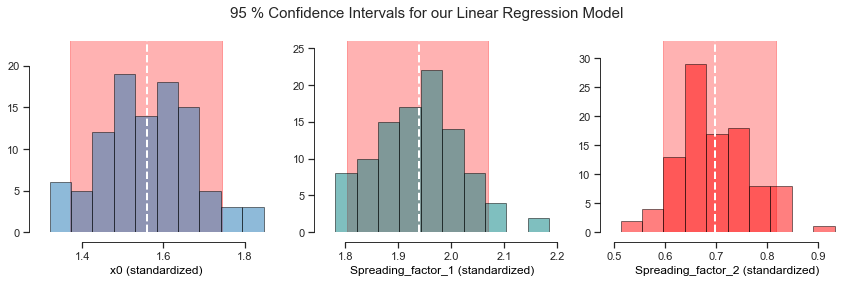

In [90]:
hist_colors = ["tab:blue", "teal", "red", "green"]
fig, ax = plt.subplots(1,3, figsize = (12,4))
ax = ax.ravel()
sns.set(style="white", color_codes=True)

for i in range(3):
    betavals = boot_betas_df.iloc[ : , i]
    betavals.values.sort()
    
    x1 = np.percentile(betavals, 5)
    x2 = np.percentile(betavals, 95)
    
    x = np.linspace( x1, x2, 500)
    counts, bins = np.histogram( betavals )
    y = counts.max() 
    plt.sca( ax[i] )
    plt.fill_between(x, y+100, color = 'red',alpha=0.3)
    plt.hist(betavals, 
             bins = bins, 
             color=hist_colors[i],
             alpha=0.5,
             edgecolor='black', 
             linewidth=1)
    plt.ylim(0,y+ 4)
    #plt.ylabel(f'Distribution', fontsize=12)
    plt.xlabel(f'{feature_names[i]} (standardized)', fontsize=12)
    plt.axvline(x = np.mean(betavals), color='w', linewidth = 2, linestyle = "--")

fig.suptitle(f'95 % Confidence Intervals for our Linear Regression Model', fontsize = 15)
sns.despine(offset=10, trim=True);
plt.tight_layout()

<!-- END QUESTION -->

<a id="part3"></a>

## <div class='exercise'>Question 3: Single validation set [12 pts]</div> 

In this section you'll find the best degree polynomial relationship using a single validation set.

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.1</b></div>

Split your original training data such that you separate out 20% into a single validation split. Use `random_state=1` and save the resulting splits as `x_train80`, `x_val`, `y_train80`, `y_val`. (This will prevent the overwriting of the original train data variables).

_Points:_ 1

In [122]:
x_train = pd.DataFrame(df_train['Spreading_factor'])
# x_train = np.array(x_train).reshape(-1,1)

y_train = pd.DataFrame(df_train['Perc_population'])
# y_train = np.array(x_train).reshape(-1,1)

x_train.shape, y_train.shape

((423, 1), (423, 1))

In [123]:
x_train80, x_val, y_train80, y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  train_size=0.8, 
                                                  random_state=1)


In [124]:
x_train80.shape, x_val.shape, y_train80.shape, y_val.shape

((338, 1), (85, 1), (338, 1), (85, 1))

In [125]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2</b></div>

- Fit polynomial regression models for **degrees 1 to 30 (inclusive)** on the 80% training set (one model for each degree polynomial regression).
- Store the train and validation MSE values for each model in lists called `train_mses` and `val_mses`.

_Points:_ 2

In [126]:
maxdeg = 31
train_mses, val_mses = [],[]

for d in range(1, maxdeg):
    x_poly_train = PolynomialFeatures(degree = d).fit_transform(x_train80)
    x_poly_val = PolynomialFeatures(degree = d).fit_transform(x_val)
    lreg = LinearRegression(fit_intercept=False)
    lreg.fit(x_poly_train, y_train80)
    y_train_pred = lreg.predict(x_poly_train)
    y_val_pred = lreg.predict(x_poly_val)
    train_mses.append(mean_squared_error(y_train80, y_train_pred))
    val_mses.append(mean_squared_error(y_val, y_val_pred))

In [127]:
grader.check("q3.2")

q3.2 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.3</b></div>

- Generate a single plot illustrating the train and validation $MSE$ values for each fitted degree polynomial regression model.
- Identify and report the degree for which the validation error is lowest.

**Note:** Plotting the MSE on a log scale may be helpful.

_Points:_ 4

In [128]:
min_mse = min(val_mses)
best_degree = val_mses.index(min_mse) + 1

# Print the degree of the best model computed above
print("The best degree of the model is",best_degree)

The best degree of the model is 15


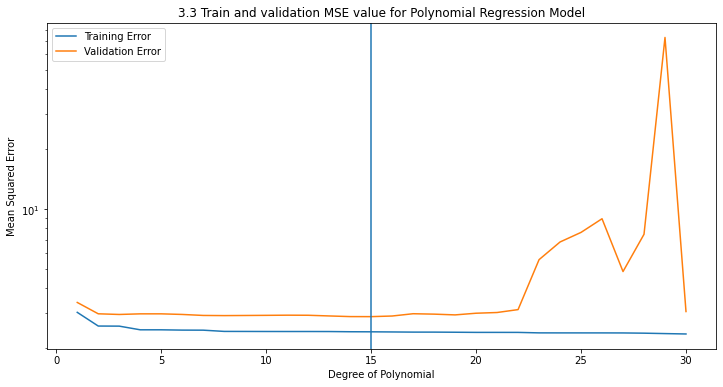

In [129]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(range(1, maxdeg),train_mses , label="Training Error")
ax.plot(range(1, maxdeg),val_mses, label = "Validation Error")
ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel('Mean Squared Error')
ax.legend(loc = 'best')
ax.set_yscale('log')
plt.axvline(x = 15)
plt.title("3.3 Train and validation MSE value for Polynomial Regression Model")
plt.show();

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.4</b></div>

Now, with the best degree selected, train the polynomial regression on the **complete training set** (including the observations that you had previously removed to make the validation set). 

Append a new dictionary to your `results` list for this model.

_Points:_ 3

In [431]:
df_train = pd.read_csv('data/bacteria_train.csv')
df_test = pd.read_csv('data/bacteria_test.csv')

df_train_sorted = df_train.sort_values(by=['Spreading_factor'], ascending=True)
df_test_sorted = df_test.sort_values(by=['Spreading_factor'], ascending=True)

In [432]:
df_train

,Perc_population,Spreading_factor
0,1.535,0.190708
1,5.555,0.326928
2,-0.277,-0.459699
3,1.724,-0.193013
4,-0.550,-0.835745
...,...,...
418,-0.461,-1.536030
419,2.179,1.445470
420,6.328,1.107800
421,3.854,0.841114


In [433]:
x_train = df_train_sorted['Spreading_factor']
x_test = df_test_sorted['Spreading_factor']

y_test = df_test_sorted['Perc_population']
y_train = df_train_sorted['Perc_population']

x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((423, 1), (108, 1), (423, 1), (108, 1))

In [434]:
x_poly_train = PolynomialFeatures(degree = best_degree).fit_transform(x_train)
x_poly_val = PolynomialFeatures(degree = best_degree).fit_transform(x_test)
model_3 = LinearRegression()
model_3.fit(x_poly_train, y_train)
y_train_pred = model_3.predict(x_poly_train)
y_test_pred = model_3.predict(x_poly_val)
train_mse_3 = (mean_squared_error(y_train, y_train_pred))
test_mse_3 = (mean_squared_error(y_test, y_test_pred))

In [435]:
results_dic_3 = {}

In [436]:
results_dic_3['model'] = '3.4'
results_dic_3['train_mse'] = float(train_mse_3)
results_dic_3['test_mse'] = float(test_mse_3)
results.append(results_dic_3)

In [439]:
pd.DataFrame(results)

,model,train_mse,test_mse
0,2.2,2.661715,2.674863
1,3.4,2.512517,2.613011


In [438]:
grader.check("q3.4")

q3.4 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.5</b></div>

Generate a plot of the data and your regression curve (similar to [Question 2.3](#part2)). Comment on how your model fits the data and compare it to the fit of your "guesstimated" model from [Question 2](#part2solutions).

_Points:_ 2

- Based on the plot of the data and the regression curve, we can see the model fits the data nicely. 
- Comparing to the guesstimated model from question 2, the curvature is a lot more complex. 
- Based on the dataframe of results, we can see in this model both train_mse and test_mse decreases. In other words, the fitting of this model is better than the "guesstimated" model. 

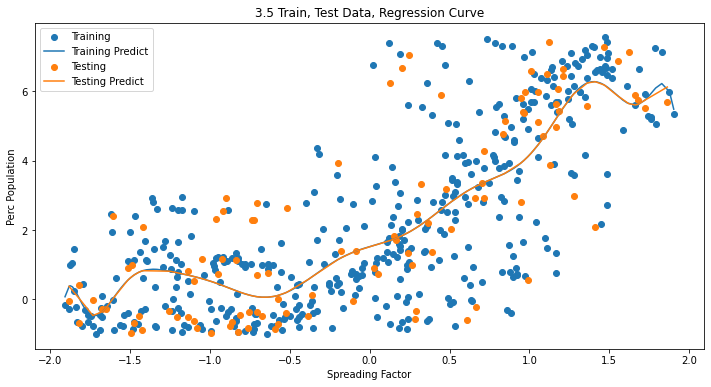

In [135]:
fig, ax = plt.subplots(figsize=(12,6))
plt.scatter(x_train, y_train, label="Training")
plt.plot(x_train, y_train_pred, label="Training Predict")

plt.scatter(x_test, y_test, label="Testing")
plt.plot(x_test, y_test_pred, label="Testing Predict")
plt.legend()
plt.xlabel('Spreading Factor')
plt.ylabel('Perc Population')
plt.title("3.5 Train, Test Data, Regression Curve")
plt.show();

<a id="part4"></a>

## <div class='exercise'>Question 4: Finding the best model by k-fold cross validation [14 pts]</div> 

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.1</b></div>

In this part we find the best degree polynomial regression by running the model on a range of degree values and using k-fold cross validation. Note that `cross_validation` should be passed *all* training examples (*not* the 80% split from the previous question).

- Use scikit-learn's `cross_validate(...)` to perform cross validation with $k=10$ for each polynomial regression from **degree 1 to 30 (inclusive)**.
- For each degree:
    - store the mean train MSE across all $k$ folds in the list `train_mses_mean`
    - store the mean validation MSE across all $k$ folds in the list `val_mses_mean`
    - store the standard deviation  of the validation MSE across all $k$ folds in the list `val_mses_std`
    

_Points:_ 4

In [440]:
df_train = pd.read_csv('data/bacteria_train.csv')
df_test = pd.read_csv('data/bacteria_test.csv')

df_x_train = df_train['Spreading_factor']
y_train = df_train['Perc_population']
x_train = np.array(df_x_train).reshape(-1,1)

In [441]:
maxdeg = 31
train_mses_mean, val_mses_mean, val_mses_std = [],[],[]

for d in range(1, maxdeg):
    
    x_poly_train = PolynomialFeatures(d,include_bias=False).fit_transform(x_train)
    lreg = LinearRegression(fit_intercept=True)
    
    lreg.fit(x_poly_train, y_train)
    y_train_pred = lreg.predict(x_poly_train)
    
    mse_score = cross_validate(lreg, x_poly_train, y_train, cv=10, scoring="neg_mean_squared_error", return_train_score=True )    
    train_mses_mean.append(-1*np.mean(mse_score['train_score']))
    val_mses_mean.append(-1*np.mean(mse_score['test_score']))
    val_mses_std.append(np.std(mse_score['test_score']))
    

In [79]:
grader.check("q4.1")

q4.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.2</b></div>

- Generate a single plot showing the mean train and validation $MSE$ values (see note below) for each degree polynomial regression, including the +/- 1 standard deviation bounds for the validation $MSE$ values.
- Comment on trends and findings illustrated by your plot.
- Print the degree of the best model, identified based on the lowest mean validation $MSE$, along with the corresponding mean train and validation $MSE$ values.

**NOTE:** When we refer to train and validation $MSE$ values here in Question 4.2 and in future problems where we are performing cross validation, we are referring specifically to the cross-validation generated train and validation $MSE$ values. Just please remember, when accessing your validation $MSE$ values while performing cross validation with scikit-learn's `cross_validate(...)`, scikit-learn rather confusingly refers to its validation scores as `test_score` in the dictionary that it returns, even though those values are actually validation scores. Please see the `cross_validate(...)` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) for more info on this function.

_Points:_ 4

- Based on the plot, we can see the curves are slightly decreasing from left hand side, gradually become more stable in the middle range. In other words, as the degree increases the mean validation MSE value decrease. 

- However, as the degree increase even further at the range 25 to 30, the Mean validation MSE value become very unstable, increaseses, decreases, and increases. However, the changes in mean training MSE is very mild, it gradually decreases as the degree increase. In other words, as the degree increase, the model become more and more fitted to the training data, however become less and less fitted to the validation data set. Therefore the variance of the model increases. 

In [80]:
min_cross_val_mse = min(val_mses_mean)
best_cross_val_degree = val_mses_mean.index(min_cross_val_mse) + 1
best_cross_val_degree 
print("Degree of the best model is : ", best_cross_val_degree )

Degree of the best model is :  8


In [81]:
val_mses_mean

[3.1210545089333666,
 2.6973468049700733,
 2.6992539687539296,
 2.622366788331956,
 2.6299637455757994,
 2.629076074712999,
 2.6341790628089394,
 2.5990753511998643,
 2.6117089871162613,
 2.620537025040357,
 2.630548351341367,
 2.6234700955871118,
 2.6369188070929725,
 2.6309130482173995,
 2.635904562306289,
 2.6445129481798784,
 2.655114581534499,
 2.6734433444397596,
 2.6646023446431437,
 2.720885925302258,
 2.7465018329318545,
 2.7668442498791292,
 2.974362341345608,
 3.342431117784879,
 5.465288786434517,
 6.282305163669983,
 5.245546023427802,
 2.779897493282096,
 12.477629925364946,
 12.97151448049477]

In [82]:
upperbound=[]
lowerbound=[]
for a, b in zip(val_mses_mean, val_mses_std):
    upperbound.append(a+b)
    lowerbound.append(a-b)

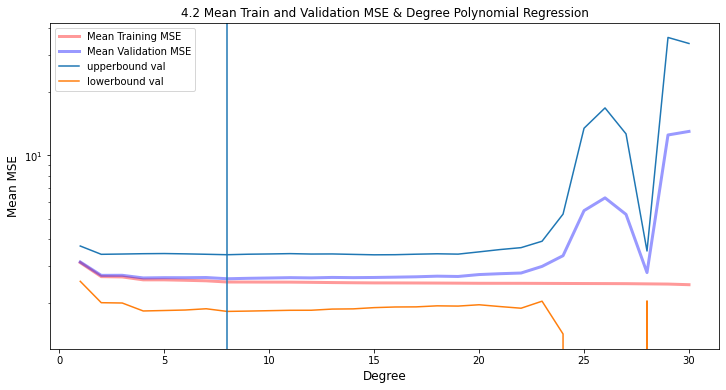

In [136]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

ax.plot(range(1,maxdeg), train_mses_mean, label = 'Mean Training MSE', linewidth=3, color='red', alpha=0.4)
ax.plot(range(1,maxdeg), val_mses_mean, label = 'Mean Validation MSE', linewidth=3, color='blue', alpha=0.4)

ax.plot(range(1,maxdeg),upperbound , label="upperbound val")
ax.plot(range(1,maxdeg),lowerbound, label="lowerbound val")
ax.axvline(x = best_cross_val_degree)

# plt.axvline(best_n)
# plt.axhline(0.95)

ax.set_xlabel('Degree', fontsize=12)
ax.set_ylabel('Mean MSE', fontsize=12)
ax.set_title("4.2 Mean Train and Validation MSE & Degree Polynomial Regression")
ax.legend()
ax.set_yscale('log')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.3</b></div>

Fit the best model based on the entire training data and report the $MSE$.


- For the best degree polynomial regression identified in Question 4.2 above, train on the complete training data and predict on the test data.
- Append a new dictionary for this model to the `results` list. 

_Points:_ 4

In [442]:
min_cross_val_mse = min(val_mses_mean)
best_cross_val_degree = val_mses_mean.index(min_cross_val_mse) + 1
best_cross_val_degree 

8

In [443]:
best_train_mses = train_mses_mean[7]
best_val_mses_mean = val_mses_mean[7]

In [444]:
x_train = df_train_sorted['Spreading_factor']
y_train = df_train_sorted['Perc_population']
x_test = df_test_sorted['Spreading_factor']
y_test = df_test_sorted['Perc_population']
x_train_reshaped = np.array(x_train).reshape(-1,1)
x_test_reshaped = np.array(x_test).reshape(-1,1)

In [445]:
x_poly_train = PolynomialFeatures(degree=best_cross_val_degree, include_bias=False).fit_transform(x_train_reshaped)
x_poly_test = PolynomialFeatures(degree=best_cross_val_degree, include_bias=False).fit_transform(x_test_reshaped)
model_4 = LinearRegression()
model_4.fit(x_poly_train, y_train)
y_train_pred = model_4.predict(x_poly_train)
y_test_pred = model_4.predict(x_poly_test)

train_mse_4 = mean_squared_error(y_train, y_train_pred)
test_mse_4 = mean_squared_error(y_test, y_test_pred)

In [446]:
results_dic_4 = {}

In [447]:
results_dic_4['model'] = '4.3'
results_dic_4['train_mse'] = float(train_mse_4)
results_dic_4['test_mse'] = float(test_mse_4)
results.append(results_dic_4)

In [448]:
results

[{'model': '2.2',
  'train_mse': 2.661715130324049,
  'test_mse': 2.6748625754403093},
 {'model': '3.4',
  'train_mse': 2.5125174574727875,
  'test_mse': 2.613010637353009},
 {'model': '4.3',
  'train_mse': 2.5125174574727875,
  'test_mse': 2.613010637353015}]

In [93]:
grader.check("q4.3")

q4.3 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.4</b></div>

- Generate a plot of the data and your regression curve (similar to [Question 2.3](#part2)).
- Display the coefficients of your model.
- Display `results` as a DataFrame (there should now be 3 entries).
- Comment on how your model fits the data and how your model compares relative to the prior best-fit model you generated using just a single validation set in [Question 3](#part3solutions).

_Points:_ 2

- The curves of this model is smoother comapred to the Q3 model. 
- Based on the graph and chart, we can see the cross_validation best degree fits the test data better than the Q3 model. 
- For instance, if we look at the right hand side of the prediction line, we can find the two curves of training and testing prediction are more overlapped, have less differences compared to the Q3 model.

In [449]:
pd.DataFrame(results)

,model,train_mse,test_mse
0,2.2,2.661715,2.674863
1,3.4,2.512517,2.613011
2,4.3,2.512517,2.613011


In [144]:
df_train_sorted=df_train.sort_values(by=['Spreading_factor'])
df_test=pd.read_csv('data/bacteria_test.csv')

df_test_sorted=df_test.sort_values(by=['Spreading_factor'])
df_train_sorted.head()

,Perc_population,Spreading_factor
276,-0.161,-1.90824
402,-0.280,-1.88138
422,0.987,-1.87563
78,1.046,-1.86220
230,1.457,-1.85260


In [145]:
x_train = df_train_sorted['Spreading_factor']
y_train = df_train_sorted['Perc_population']
x_test = df_test_sorted['Spreading_factor']
y_test = df_test_sorted['Perc_population']
x_train_reshaped = np.array(x_train).reshape(-1,1)
x_test_reshaped = np.array(x_test).reshape(-1,1)

x_poly_train = PolynomialFeatures(degree=best_cross_val_degree , include_bias=False).fit_transform(x_train_reshaped)
x_poly_test = PolynomialFeatures(degree=best_cross_val_degree , include_bias=False).fit_transform(x_test_reshaped)
# x_train_reshaped

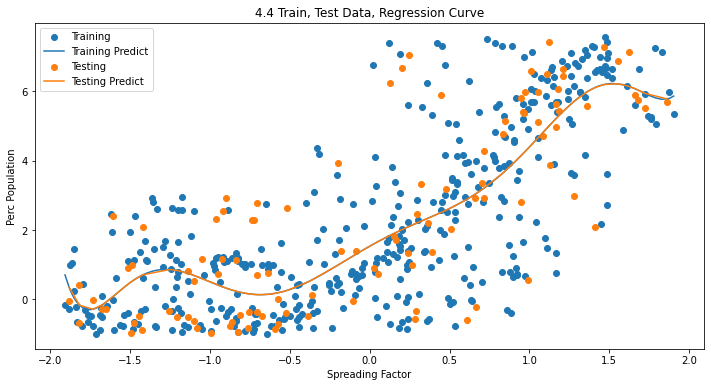

In [146]:
fig, ax = plt.subplots(figsize=(12,6))
plt.scatter(x_train, y_train, label="Training")
plt.plot(x_train, y_train_pred, label="Training Predict")

plt.scatter(x_test, y_test, label="Testing")
plt.plot(x_test, y_test_pred, label="Testing Predict")
plt.legend()
plt.xlabel('Spreading Factor')
plt.ylabel('Perc Population')
plt.title("4.4 Train, Test Data, Regression Curve")
plt.show();

<!-- END QUESTION -->

<a id="part5"></a>

## <div class='exercise'>Question 5: Finding the most consistent model using k-fold cross validation with bootstraps [16 pts]</div> 

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.1</b></div>

In the previous part, we used $k$-fold cross validation to find the best model. But how confident are you of your estimated best degree? We have already used bootstraps in [Question 2.4](#part2) to estimate the confidence intervals of our $\beta_i$ values. In this segment, we will use bootstrapping to test the robustness of our estimation.

- Similar to Question 2.4, **use 100 bootstraps** of your data.
- For each bootstrap:
  - Use scikit-learn's `cross_validate(...)` to perform cross validation with $k=10$ *for each polynomial regression* of **degrees 1 to 30 (inclusive)**.
  - Select the best degree polynomial based on the lowest mean cross-validation MSE and store this degree in a list called `best_degrees`.
- After completing your bootstraps, `best_degrees` should have 100 elements, one degree for each completed bootstrap.

**NOTE:** Once complete, your code for this problem will likely take several minutes to execute. This is to be expected.

_Points:_ 4

In [270]:
x_train = pd.DataFrame(df_train['Spreading_factor'])
y_train = pd.DataFrame(df_train['Perc_population'])

In [271]:
n_boots = 100
boot_models = []
boot_betas = []
maxdeg = 31
best_degrees = []

fit_intercept = True

for i in range(n_boots):
    train_mses_mean, val_mses_mean, val_mses_std = [],[],[]
    # Randomly sample indices
    boot_i = np.random.choice(x_train.index, 
                              replace = True, 
                              size = len(x_train.index))
    
    # Create bootstrap datasets
    X_train_boot = x_train.iloc[boot_i,:]
    y_train_boot = y_train.iloc[boot_i]
    
    for d in range(1, maxdeg):
        X_poly_train_boot = PolynomialFeatures(degree = d, include_bias=False).fit_transform(X_train_boot)  
        boot_linreg = LinearRegression(fit_intercept = fit_intercept).fit(X_poly_train_boot, y_train_boot)
        boot_models.append(boot_linreg)
        coefs = np.insert(boot_linreg.coef_[0], 0, boot_linreg.intercept_[0], axis=None)
        boot_betas.append(coefs)
        mse_score = cross_validate(boot_linreg, X_poly_train_boot, y_train_boot, cv=10, scoring="neg_mean_squared_error", return_train_score=True )    
        
        train_mses_mean.append(-1*np.mean(mse_score['train_score']))
        val_mses_mean.append(-1*np.mean(mse_score['test_score']))
        val_mses_std.append(np.std(mse_score['test_score']))
        
    best_degree = np.argmin(val_mses_mean)+1
    best_degrees.append(int(best_degree))


In [272]:
len(best_degrees)

100

In [273]:
best_degrees

[8,
 18,
 8,
 9,
 17,
 8,
 8,
 13,
 8,
 13,
 15,
 16,
 8,
 15,
 13,
 8,
 8,
 10,
 8,
 7,
 8,
 8,
 12,
 4,
 8,
 9,
 8,
 18,
 8,
 8,
 8,
 8,
 8,
 14,
 19,
 10,
 13,
 13,
 8,
 8,
 19,
 8,
 11,
 30,
 8,
 8,
 8,
 18,
 8,
 4,
 16,
 8,
 8,
 8,
 10,
 16,
 8,
 23,
 15,
 8,
 13,
 8,
 8,
 8,
 12,
 20,
 8,
 8,
 8,
 17,
 14,
 8,
 10,
 7,
 17,
 8,
 8,
 8,
 9,
 14,
 8,
 8,
 16,
 8,
 4,
 8,
 17,
 6,
 7,
 14,
 16,
 8,
 8,
 8,
 8,
 18,
 8,
 8,
 8,
 15]

In [274]:
grader.check("q5.1")

q5.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.2</b></div>

Generate a well-labeled bar plot, with the polynomial degree on the $x$-axis and the number of times that degree was deemed best on the $y$-axis, using the `best_degrees` saved during your bootstraps.

_Points:_ 4

In [275]:
max(best_degrees)

30

In [276]:
min(best_degrees)

4

In [277]:
counts=[]
for i in range(4, 29):
    count = best_degrees.count(i)
    counts.append(count)
counts

[3, 0, 1, 3, 51, 3, 4, 1, 2, 6, 4, 4, 5, 4, 4, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0]

Text(0.5, 1.0, 'best degree counts')

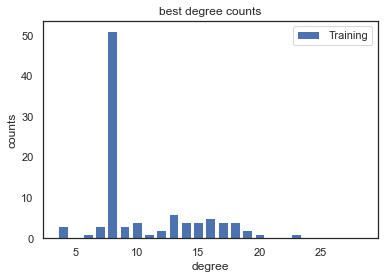

In [279]:
plt.bar(range(4, 29), counts, label='Training')

plt.xlabel('degree')
plt.ylabel('counts')
plt.legend()
plt.title('best degree counts')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.3</b></div>

What are your observations from the plot above? 

- Why do you see so much variation in the "best degree" over the bootstraps?
- Which degree polynomial regression will you choose as your overall best degree based on your bootstrapped results, and why? 

_Points:_ 3

- Because bootstrap is randomly generating datasets for x_train and y_train, therefore there are many variations in the "best degrees"
- Based on the counts list, we can see degree 8 has shown up the most times, therefore it is the best degree based on the bootstrapped results. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.4</b></div>

Now, with the overall best degree identified with your bootstrapping results above, train the polynomial regression model on the **complete training set**. Append a new dictionary for this model to your `results` list. 

_Points:_ 3

In [451]:
best_degree_5 = 8

In [452]:
x_train = df_train_sorted['Spreading_factor']
x_test = df_test_sorted['Spreading_factor']

y_test = df_test_sorted['Perc_population']
y_train = df_train_sorted['Perc_population']

x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
# y_train = np.array(y_train).reshape(-1,1)
# y_test = np.array(y_test).reshape(-1,1)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((423, 1), (108, 1), (423,), (108,))

In [453]:
x_poly_train = PolynomialFeatures(degree = best_degree_5).fit_transform(x_train)
x_poly_val = PolynomialFeatures(degree = best_degree_5).fit_transform(x_test)
model_5 = LinearRegression()
model_5.fit(x_poly_train, y_train)
y_train_pred = model_5.predict(x_poly_train)
y_test_pred = model_5.predict(x_poly_val)
train_mse_5 = (mean_squared_error(y_train, y_train_pred))
test_mse_5 = (mean_squared_error(y_test, y_test_pred))

In [454]:
results_dic_5 = {}

In [455]:
results_dic_5['model'] = '5.4'
results_dic_5['train_mse'] = float(train_mse_5)
results_dic_5['test_mse'] = float(test_mse_5)
results.append(results_dic_5)

In [456]:
results

[{'model': '2.2',
  'train_mse': 2.661715130324049,
  'test_mse': 2.6748625754403093},
 {'model': '3.4',
  'train_mse': 2.5125174574727875,
  'test_mse': 2.613010637353009},
 {'model': '4.3',
  'train_mse': 2.5125174574727875,
  'test_mse': 2.613010637353015},
 {'model': '5.4',
  'train_mse': 2.5125174574727875,
  'test_mse': 2.613010637353009}]

In [457]:
grader.check("q5.4")

q5.4 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.5</b></div>

- Generate a plot of the data and your regression curve.
- Display `results` as a DataFrame.
- Comment on how your model fits the data and compare it to the fit of your cross-validated model from [Question 4](#part4solutions).

_Points:_ 2

- Based on the plot, we can see the model fits the data pretty well. For instance, if you look at the regression curve on the right hand side, the two curve overlaps with each other. The differences is very small. 

- Comparing to the cross-validated model from question 4, the model fits pretty similarly. 

In [469]:
pd.DataFrame(results)

,model,train_mse,test_mse
0,2.2,2.661715,2.674863
1,3.4,2.512517,2.613011
2,4.3,2.512517,2.613011
3,5.4,2.512517,2.613011


In [370]:
x_train = df_train_sorted['Spreading_factor']
y_train = df_train_sorted['Perc_population']
x_test = df_test_sorted['Spreading_factor']
y_test = df_test_sorted['Perc_population']
x_train_reshaped = np.array(x_train).reshape(-1,1)
x_test_reshaped = np.array(x_test).reshape(-1,1)

x_poly_train = PolynomialFeatures(degree=best_degree_5, include_bias=False).fit_transform(x_train_reshaped)
x_poly_test = PolynomialFeatures(degree=best_degree_5, include_bias=False).fit_transform(x_test_reshaped)
# x_train_reshaped

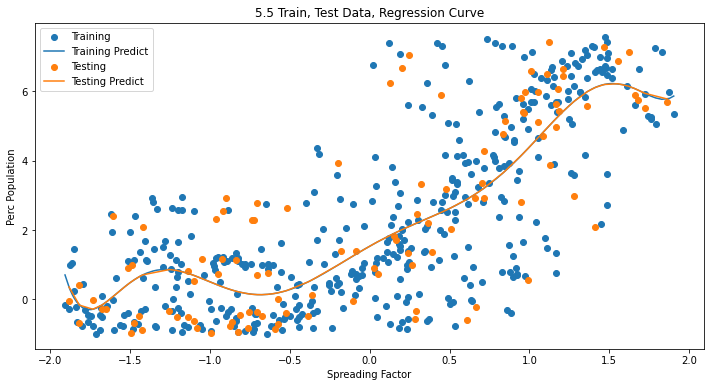

In [371]:
fig, ax = plt.subplots(figsize=(12,6))
plt.scatter(x_train, y_train, label="Training")
plt.plot(x_train, y_train_pred, label="Training Predict")

plt.scatter(x_test, y_test, label="Testing")
plt.plot(x_test, y_test_pred, label="Testing Predict")
plt.legend()
plt.xlabel('Spreading Factor')
plt.ylabel('Perc Population')
plt.title("5.5 Train, Test Data, Regression Curve")
plt.show();

In [111]:
grader.check("q5.4")

q5.4 results: All test cases passed!

<!-- END QUESTION -->

<a id="part6"></a>

## <div class='exercise'>Question 6: Improving model consistency with LASSO regularization [33 pts]</div> 

[Return to contents](#contents)

In the previous sections, we compared many polynomial models to find the best degree. For each model of degree $n$, we considered all polynomial coefficients *up to and including* **degree $n$** using `PolynomialFeatures(...)`. In this section we will consider polynomial features of $n=30$, and a **best model** that could be chosen from any possible combination of our 30 degrees.

For instance, we could choose a best model with an arbitrary set of polynomial degrees up degree 30, such as $x^i \in [x^1, x^5, x^{19}, x^{24}]$, rather than the standard approach of using *all* consecutive degrees up to our maximum degree $n=30$ as in $x^i \in [x^1, ... , x^{30}]$.

However, the total number of such possible models for $n=30$ is $2^{30}\approx10^9$, and searching through all of them would be laborious and computationally inefficient. Instead, we can use $LASSO$ (i.e. $L1$) regularization, which "switches off" highly unstable degree coefficients by shrinking them to zero (or very close to zero), thus giving us an efficient solution to this particular combinatorial challenge.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.1</b></div>

**Find the best hyper-parameter alpha, $\alpha$**

Use the `LassoCV` estimator to find the best regularization parameter from $\alpha \in [10^{-5}, 10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}]$
- Store the mean cross-validation MSEs across each fold in `lassoCV_val_mses_mean`
- Save the best $\alpha$ based on the mean cross-validation MSE in `best_alpha`

You should read the documentation for [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Some important information about this estimator:
- After calling `fit`, the model is now the one fit on the entire training data using the best alpha based on the mean CV MSE.
- the `mse_path_` attribute contains the validation scores on each fold for each candidate alpha.
- the `alpha_` attribute contains the best regularization parameter found through cross-validation

**Tips:** You should try adjusting `LassoCV`'s `max_iter` argument to prevent convergence warnings. If you are unable to prevent them with a large number of iterations (~100,000) then you can silence them with:
```{python}
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
```
Do not worry about normalizing your $x$ values for any parts of Question 6. It will not meaningfully affect our final results here.

_Points:_ 5

In [459]:
x_train = df_train['Spreading_factor']
y_train = df_train['Perc_population']
x_test = df_test_sorted['Spreading_factor']
y_test = df_test_sorted['Perc_population']
x_train_reshaped = np.array(x_train).reshape(-1,1)
x_test_reshaped = np.array(x_test).reshape(-1,1)

In [460]:
degree = 30

x_poly_train = PolynomialFeatures(degree).fit_transform(x_train_reshaped)
# x_poly_val= PolynomialFeatures(degree).fit_transform(x_test_reshaped)
# x_poly_train.reshape(-1,1)

In [232]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

k = 10
alphas = [1e-5,1e-4, 1e-3, 1e-2, 1e-1]

fitted_lasso = LassoCV(alphas=alphas, cv=k, max_iter=100000).fit(x_poly_train, y_train)

best_alpha = fitted_lasso.alpha_
lassoCV_val_mses_mean = fitted_lasso.mse_path_

In [233]:
best_alpha

0.01

In [234]:
fitted_lasso

LassoCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1], cv=10, max_iter=100000)

In [235]:
lassoCV_val_mses_mean

array([[2.98617562, 2.59726128, 1.56024768, 2.97620582, 2.15135978,
        2.34620004, 4.34404976, 2.3642201 , 2.80195337, 2.325822  ],
       [2.90229631, 2.63597841, 1.40215541, 2.89115585, 2.07078587,
        2.3530961 , 4.54474504, 2.18875162, 2.64190458, 2.2463396 ],
       [2.88643138, 2.62378076, 1.44560908, 2.8795963 , 2.09679504,
        2.3518161 , 4.56039043, 2.15647072, 2.78013198, 2.22442053],
       [2.88999253, 2.61696793, 1.4604345 , 2.87974873, 2.10496592,
        2.35003955, 4.55145265, 2.15862541, 2.83497701, 2.23819169],
       [2.8928478 , 2.61727321, 1.46573366, 2.88171929, 2.1102916 ,
        2.35136456, 4.54826572, 2.16196213, 2.8458312 , 2.24901473]])

In [216]:
grader.check("q6.1")

q6.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.2</b></div>

Generate two plots:
- One showing the mean validation $MSE$ values for each regularization parameter $\alpha$, identifying the best $\alpha$.
- Another showing the values for each of the model's coefficients. 

_Points:_ 5

In [312]:
lassoCV_val_mses_mean

array([[2.98617562, 2.59726128, 1.56024768, 2.97620582, 2.15135978,
        2.34620004, 4.34404976, 2.3642201 , 2.80195337, 2.325822  ],
       [2.90229631, 2.63597841, 1.40215541, 2.89115585, 2.07078587,
        2.3530961 , 4.54474504, 2.18875162, 2.64190458, 2.2463396 ],
       [2.88643138, 2.62378076, 1.44560908, 2.8795963 , 2.09679504,
        2.3518161 , 4.56039043, 2.15647072, 2.78013198, 2.22442053],
       [2.88999253, 2.61696793, 1.4604345 , 2.87974873, 2.10496592,
        2.35003955, 4.55145265, 2.15862541, 2.83497701, 2.23819169],
       [2.8928478 , 2.61727321, 1.46573366, 2.88171929, 2.1102916 ,
        2.35136456, 4.54826572, 2.16196213, 2.8458312 , 2.24901473]])

In [284]:
MSE_mean = []
for i in range (5):
    MSE_mean.append(np.mean(lassoCV_val_mses_mean[i]))
MSE_mean

[2.6453495450967823,
 2.5877208789102766,
 2.60054423232842,
 2.6085395932667454,
 2.6124303892275327]

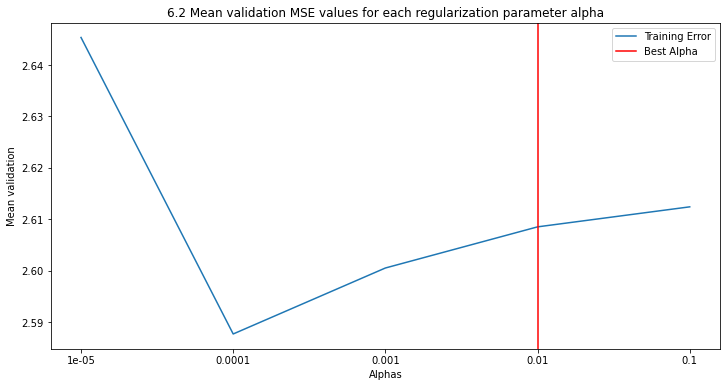

In [322]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.plot(range(0,5),MSE_mean , label="Training Error")
i=alphas.index(best_alpha)
plt.xticks([0,1,2,3,4,],alphas)
plt.xlabel('Alphas')
plt.ylabel('Mean validation')
ax.axvline(x=i, label="Best Alpha", color="red")
plt.legend()
plt.title("6.2 Mean validation MSE values for each regularization parameter alpha")
plt.show();

In [302]:
fitted_lasso.coef_

array([ 0.00000000e+00,  2.03013971e+00,  0.00000000e+00, -0.00000000e+00,
        8.29012588e-01, -2.52760330e-02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -2.66885556e-02, -4.65210295e-04,  1.72453623e-05, -4.65787413e-04,
        1.07385213e-03,  1.36717817e-04,  2.34206508e-04,  4.25161428e-05,
        4.06762323e-05,  2.90207516e-06,  4.99124796e-06, -1.14666853e-06,
        1.14764235e-07, -5.31444424e-07, -2.50324029e-07, -9.75194576e-08,
       -1.45674215e-07,  1.36076222e-08, -6.43412916e-08])

In [307]:
fitted_lasso.coef_.shape

(31,)

In [ ]:
fitted_lasso

LassoCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1], cv=10, max_iter=100000)

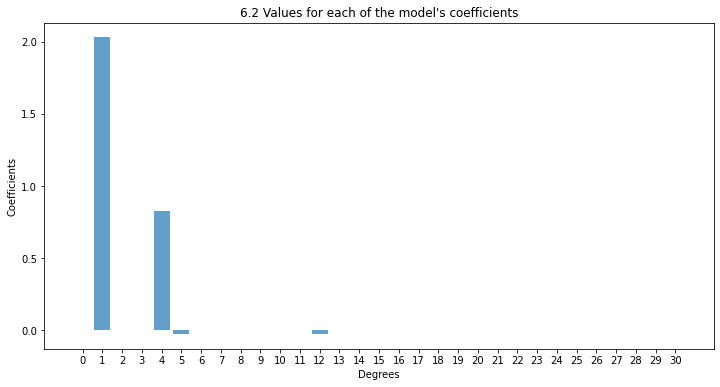

In [468]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(range(31), fitted_lasso.coef_, alpha=0.7)
plt.xticks(range(31))

# for bars in ax.containers:
#     ax.bar_label(bars, fontsize=5)

plt.xlabel('Degrees')
plt.ylabel('Coefficients')
plt.title("6.2 Values for each of the model's coefficients")
plt.show();

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.3</b></div>

**Find the most significant degrees**

**NOTE: The code for this question has been provided. It can take several minutes to run. Just be sure to answer the interpretation part of the question.**

From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this best $\alpha$ value to find the "most significant" set of polynomial degrees by using bootstraps.

What we mean by this is, for each bootstrap of the data, you will get some set of degrees that are **significant**, as will be indicated by the value of their coefficients. Typically, while using $LASSO$ regularization, we would consider $\mid\beta_i\mid \gt 0$ as an indication of a particular coefficient's significance. However, for this particular exercise, we are going to use $\mid\beta_i\mid \gt 0.1$ as our criteria for significance (we have found this $0.1$ threshold to work well when designing this particular problem).

Based on this criteria, you will identify which degree coefficients are significant over many bootstrapped iterations with $n=30$ polynomial features and your chosen best $\alpha$ from Question 6.1.

- Use polynomial features with **degree 30**.
- Use a dictionary called `significant_degrees` to store a cumulative count for each degree identified as significant during your bootstraps.
- Run at least 100 bootstraps of your data.
- For each bootstrap:
  - Train a `Lasso(...)` model with the `best_alpha` identified in Question 6.1.
  - Identify the significant polynomial degree coefficients using $\mid\beta_i\mid \gt 0.1 $ as our threshold for significance.
  - For each significant coefficient, update the count of that degree in your `significant_degrees` dictionary.
- Generate a bar plot showing the count for each degree, showing how many times it was identified as significant over your bootstraps.
- Based on this plot, there should likely be a clear maximum degree, above which, few if any iterations have been identified as significant. Interpret your bar plot, choose a maximum degree polynomial based upon it, and explain your rationale for choosing that degree.

_Points:_ 5

- Based on the bar plot, we can see number of times each degree was identified as significant are below degree 11. Since at the 11th degree, there are only a few times. 
- Therefore the maximum degree polynomial based on the plot is 10. 

In [329]:
# Set bootstrapping parameters
numboot = 100

max_degree = 30
include_bias = False
fit_intercept = True
max_iter = 100000

# Create empty dictionary for storing results
significant_degrees = {}

# Perform bootstraps
df_train = pd.read_csv('data/bacteria_train.csv')
for i in range(numboot):
    df_boot = df_train.sample(frac=1, replace=True)
    x_train_boot = df_boot[["Spreading_factor"]]
    x_poly_train = PolynomialFeatures(
        max_degree, include_bias=include_bias
    ).fit_transform(x_train_boot)
    y_train_boot = df_boot.Perc_population

    lasso = Lasso(
        fit_intercept=fit_intercept,
        max_iter=max_iter,
        alpha=best_alpha,
    )
    lasso.fit(x_poly_train, y_train_boot)
    
    if fit_intercept==True:
        coefficients = [lasso.intercept_, *lasso.coef_]
    else:
        coefficients = lasso.coef_

    for i in np.where(np.abs(coefficients)>0.1)[0]:
        if i not in significant_degrees.keys():
            significant_degrees[i]=1
        else:
            significant_degrees[i]+=1

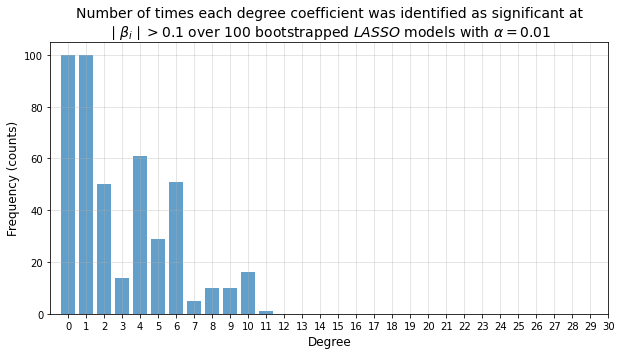

In [330]:
fig, ax = plt.subplots(figsize=(10,5))

lists = sorted(significant_degrees.items())

x, y = zip(*lists)

ax.bar(x, y, alpha=0.7)
ax.set_xlabel("Degree", fontsize=12)
ax.set_ylabel("Frequency (counts)", fontsize=12)
ax.set_xticks(range(max_degree+1))
ax.set_title(
    "Number of times each degree coefficient was identified as significant at\n"
    f"$\mid\\beta_i\mid > 0.1$ over {numboot} bootstrapped $LASSO$ models "
    f"with $\\alpha={best_alpha}$",
    fontsize=14,
)
plt.grid(":", alpha=0.4)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.4</b></div>

From our Question 6.3 results, we can see that only some degrees are consistently significant over many bootstraps.

- Use polynomial features based on the maximum degree you identified using your results from Question 6.3 (for the sake of simplicity, use all degrees up to that maximum degree as is typically done in polynomial regression).
- Train your **LASSO** regularized model using your `best_alpha` hyper-parameter on the entire training set.
- Append a new dictionary for this model to your `results` list.

_Points:_ 6

In [242]:
best_alpha 

0.01

In [376]:
df_train = pd.read_csv('data/bacteria_train.csv')
df_test = pd.read_csv('data/bacteria_test.csv')
x_train = df_train[["Spreading_factor"]]
x_test = df_test[["Spreading_factor"]]
y_test =df_test['Perc_population']
y_train = df_train['Perc_population']
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

In [386]:
best_degree = 10
include_bias = False
fit_intercept = True
max_iter = 100000

train_mses =[]
test_mses = []
lasso_coef = []


for d in range(1,best_degree+1):

    x_poly_train = PolynomialFeatures(d, include_bias=include_bias).fit_transform(x_train)
    x_poly_test = PolynomialFeatures(d, include_bias=include_bias).fit_transform(x_test)

    lasso = Lasso(fit_intercept=fit_intercept, max_iter=max_iter, alpha=best_alpha)
    lasso.fit(x_poly_train, y_train)
    
    lasso_coef.append(lasso.coef_)

    if fit_intercept==True:
        coefficients = [lasso.intercept_, *lasso.coef_]
    else:
        coefficients = lasso.coef_

    y_train_pred = lasso.predict(x_poly_train)
    y_test_pred = lasso.predict(x_poly_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mses.append(train_mse)
    test_mses.append(test_mse)

In [387]:
best_degree_6 = np.argmin(test_mses) + 1
best_degree_6

8

In [390]:
train_mses[best_degree_6]

[3.0998363410461853,
 2.661965438917944,
 2.65456530634155,
 2.5741792442522793,
 2.573783599904434,
 2.560583851075095,
 2.559681780260012,
 2.5500752366969666,
 2.551062496688519,
 2.523310932126468]

In [394]:
dict6={}
dict6['model']='6.4'
dict6['train_mse']=train_mses[7]
dict6['test_mse']=min(test_mses)

In [395]:
results.append(dict6)

In [396]:
results

[{'model': '2.2',
  'train_mse': 2.661715130324049,
  'test_mse': 2.6748625754403093},
 {'model': '3.4',
  'train_mse': 2.4909456088704403,
  'test_mse': 2.736482506408877},
 {'model': '4.3',
  'train_mse': 2.5125174574727875,
  'test_mse': 2.613010637353015},
 {'model': '5.4',
  'train_mse': 2.5125174574727875,
  'test_mse': 2.613010637353009},
 {'model': '6.4',
  'train_mse': 2.5500752366969666,
  'test_mse': 2.590150705206933}]

In [ ]:
grader.check("q6.4")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.5</b></div>

- Generate a plot of the data and your regression curve.
- Report the polynomial degrees and corresponding coefficients for this fully trained model that have an absolute value greater than 0.1 (i.e. $\mid\beta_i\mid \gt 0.1 $)
- Display `results` as a DataFrame.

_Points:_ 6

In [402]:
pd.DataFrame(results)

,model,train_mse,test_mse
0,2.2,2.661715,2.674863
1,3.4,2.490946,2.736483
2,4.3,2.512517,2.613011
3,5.4,2.512517,2.613011
4,6.4,2.550075,2.590151


In [397]:
df_train = pd.read_csv('data/bacteria_train.csv')
df_test = pd.read_csv('data/bacteria_test.csv')
df_test_sorted = df_test.sort_values(by=['Spreading_factor'])
df_train_sorted = df_train.sort_values(by=['Spreading_factor'])
x_train = df_train_sorted ['Spreading_factor']
x_test = df_test_sorted['Spreading_factor']
y_train = df_train_sorted ['Perc_population']
y_test = df_test_sorted ['Perc_population']
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

In [398]:
best_degree = best_degree_6
include_bias = False
fit_intercept = True
max_iter = 100000

x_poly_train = PolynomialFeatures(best_degree, include_bias=include_bias).fit_transform(x_train)
x_poly_test = PolynomialFeatures(best_degree, include_bias=include_bias).fit_transform(x_test)


lasso = Lasso(fit_intercept=fit_intercept, max_iter=max_iter, alpha=best_alpha)
lasso.fit(x_poly_train, y_train)

if fit_intercept==True:
    coefficients = [lasso.intercept_, *lasso.coef_]
else:
    coefficients = lasso.coef_

y_train_pred = lasso.predict(x_poly_train)
y_test_pred = lasso.predict(x_poly_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

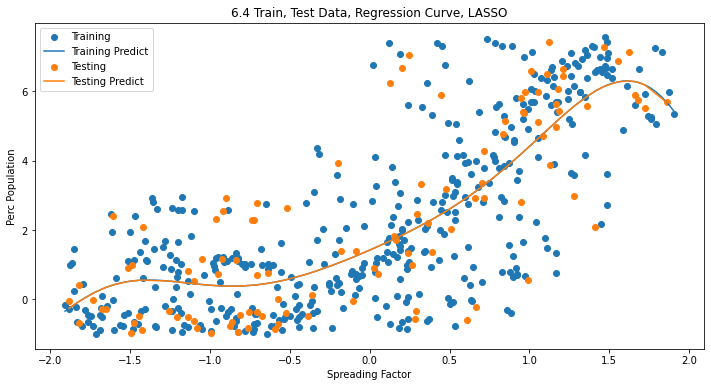

In [399]:
fig, ax = plt.subplots(figsize=(12,6))
plt.scatter(x_train, y_train, label="Training")
plt.plot(x_train, y_train_pred, label="Training Predict")

plt.scatter(x_test, y_test, label="Testing")
plt.plot(x_test, y_test_pred, label="Testing Predict")
plt.legend()
plt.xlabel('Spreading Factor')
plt.ylabel('Perc Population')
plt.title("6.4 Train, Test Data, Regression Curve, LASSO")
plt.show();

In [401]:
lasso_coef

[array([1.82730463]),
 array([1.92595084, 0.69336651]),
 array([ 2.05000505,  0.68523334, -0.06603262]),
 array([ 2.09052919,  1.43749156, -0.10482102, -0.26387234]),
 array([ 2.02746082,  1.44468896, -0.        , -0.26844464, -0.03044216]),
 array([ 2.04634796,  0.85273648,  0.        ,  0.2852452 , -0.03509923,
        -0.12120783]),
 array([ 2.01395106e+00,  8.40690178e-01,  0.00000000e+00,  2.98160876e-01,
         3.13459889e-04, -1.24635933e-01, -1.06241000e-02]),
 array([ 2.01341651,  0.54533435,  0.        ,  0.76533371,  0.        ,
        -0.35658448, -0.01050852,  0.03525171]),
 array([ 1.97549723,  0.5914269 , -0.        ,  0.68443172, -0.        ,
        -0.31213098,  0.00931847,  0.02784689, -0.00581426]),
 array([ 1.99120342e+00,  0.00000000e+00, -0.00000000e+00,  1.13696202e+00,
        -1.40590203e-03,  0.00000000e+00, -0.00000000e+00, -2.72060330e-01,
        -2.96030817e-03,  5.40901585e-02])]

In [405]:
np.argmax(lasso.coef_)

0

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.6</b></div>

**What are your observations?**

- Compare your `best_degree` from [Question 5](#part5solutions) with your chosen degree in 6.4 above and comment on the difference.
- Compare your test $MSE$ in this question with the result from question 5. Which one is smaller, and by how much?
- Which degree coefficients in your best fit model from 6.4 are significant? If not all coefficients are significant, why?
- Would you expect your current model from 6.4 to be more "reliable" or robust than the models in Question 5 and prior? On what basis would you make a claim of its robustness?


_Points:_ 6

In [403]:
pd.DataFrame(results)

,model,train_mse,test_mse
0,2.2,2.661715,2.674863
1,3.4,2.490946,2.736483
2,4.3,2.512517,2.613011
3,5.4,2.512517,2.613011
4,6.4,2.550075,2.590151


In [406]:
np.argmax(lasso.coef_)
lasso.coef_

array([ 2.01341651,  0.54533435,  0.        ,  0.76533371,  0.        ,
       -0.35658448, -0.01050852,  0.03525171])

- Comparing to the plot from 5.4, although the degrees are the same (best degree is 8), the shape of the plots look different. That is because for 6.4 we used the LASSO approach.
- Based on the results, we can see the test_mse of 6.4 is around 2.59, and the train_mse of 5.4 is around 2.61, which is a 0.2 decrease. 
- Based on the exported values of coefficients we can see the first, second, and fourth values are significant. Some of the coefficients are zero, and some are below zero. That is because we are using LASSO for this section
- The current model is more robust becuase for this section we are using LASSO which eliminate lots of unnecessary information from the model

<!-- END QUESTION -->

<a id="part7"></a>

## <div class='exercise'>Question 7: Analyze your best test MSEs for each sub section of the homework [6 pts]</div> 

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q7.1</b></div>

Using the `results` list, generate a bar plot illustrating the test $MSE$ values for each of the models. Display `results` as a Dataframe as well.

_Points:_ 3

In [410]:
results_df = pd.DataFrame(results)
results_df

,model,train_mse,test_mse
0,2.2,2.661715,2.674863
1,3.4,2.490946,2.736483
2,4.3,2.512517,2.613011
3,5.4,2.512517,2.613011
4,6.4,2.550075,2.590151


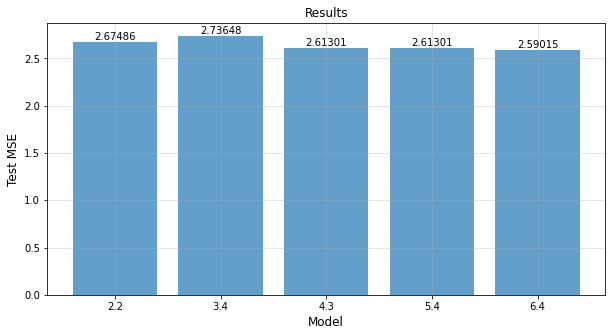

In [413]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(results_df['model'], results_df['test_mse'], alpha=0.7)
ax.set_xlabel("Model", fontsize=12)
ax.set_ylabel("Test MSE", fontsize=12)
ax.set_title("Results")
plt.grid(":", alpha=0.4)
for bars in ax.containers:
    ax.bar_label(bars)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q7.2</b></div>

Which model do you think is best, and why? What are some of that model's drawbacks compared to the other models? 

_Points:_ 3

Based on the plot from the bar chart, we can see model 6.4 has the lowest Test MSE compared to all the other model. 
Based on the dataframe of results, on the other hand, we can see, model 3.4 has the lowest train mse yet the highest test mse. 

- model 2: guesstimated degree (2), is biased
- model 3: validation, has the chance of overfitting
- model 4: k fold cross validation, , has the chance of overfitting
- Model 5: cross validation and bootstrap, has the chance of overfitting
- model 6: LASSO reuglarization to improve consistency, more consistency

<!-- END QUESTION -->

**This concludes HW3. Thank you!**

[Return to contents](#contents)